In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
Simulate a system of ordinary differential equations
using forward time differencing and compare two simulations
having different initial conditions.

"""
__author__    = "Taylor McHone"
__contact__   = "taylor.mchone@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles


In [3]:
#define constants
a = 0.25
b = 4.0
F = 8.0
G = 1.0

#set initial conditions
(x_0, y_0, z_0) = (2.5, 1.0, 0.0)
(x_01, y_01, z_01) = (2.49, 1.0, 0.0)

In [4]:
#function that takes values at time t of x, y and z and returns values for x, y and z at time (t + time_change)
def next(x, y, z, time_change):
    x_next = x + time_change*(-(y**2) - (z**2) - a*x + a*F)
    y_next = y + time_change*(x*y - b*x*z - y + G)
    z_next = z + time_change*(b*x*y + x*z - z)
    return (x_next, y_next, z_next)

In [14]:
#run to 120 days using time step of 4 hours
#1 time unit = five days
time_step = 4/(24*5)
time_units = 120/5
times = np.arange(0,24.01,time_step)

In [6]:
(x,y,z) = (x_0, y_0, z_0)
mx0 = np.zeros((len(times),3))
for idx in range(len(times)):
    (x, y, z) = next(x,y,z,time_step)
    mx0[idx] = (x,y,z)
    
(x1,y1,z1) = (x_01, y_01, z_01)
mx1 = np.zeros((len(times),3))
for idx in range(len(times)):
    (x1, y1, z1) = next(x1,y1,z1,time_step)
    mx1[idx] = (x1,y1,z1)

In [7]:
times = times*5

In [8]:
mx1 = mx1.T
mx0 = mx0.T

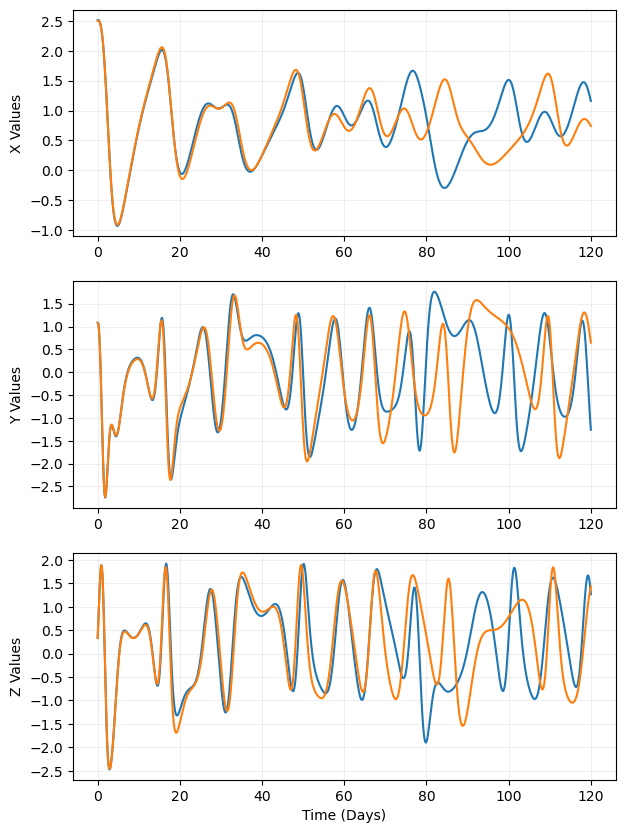

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 10))
ax1.plot(times,mx0[0])
ax1.plot(times,mx1[0])
ax1.set_ylabel('X Values')
minor_ticks = np.arange(-1, 2.5, 0.5)
ax1.set_yticks(minor_ticks, minor=True)
ax1.grid(which='both', alpha=0.2)

ax2.plot(times,mx0[1])
ax2.plot(times,mx1[1])
ax2.set_ylabel('Y Values')
minor_ticks = np.arange(-2.5, 2, 0.5)
ax2.set_yticks(minor_ticks)
ax2.grid(which='both', alpha=0.2)


ax3.plot(times,mx0[2])
ax3.plot(times,mx1[2])
ax3.set_ylabel('Z Values')
ax3.set_xlabel('Time (Days)')
minor_ticks = np.arange(-2.5, 2.5, 0.5)
ax3.set_yticks(minor_ticks)
ax3.grid(which='both', alpha=0.2)


In [10]:
### In a separate text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
''' 
    The two simulations are not the same throughout the entire period. They both begin similarly and diverge more as time
goes on. Early in the simulations, the x, y and z-values differ slightly but follow the same general pattern. Around 70 
days, the general trends of the values in the two simulations start to differ.
    The only difference in these two simulations is the starting conditions. Thus, the divergence in values as time 
goes on can be attributed to the different initial conditions. Assuming this simulation serves as a proxy for NWP models,
it shows that it is important to provide the models with accurate and balanced initial conditions. If these are not
provided, the models will pick up the small initial differences, diverge throughout the simulation run,
and could end with significantly different values.

'''

'\n    The two simulations are not the same throughout the entire period. They both begin similarly and diverge more as time\ngoes on. Early in the simulations, the x, y and z-values differ slightly but follow the same general pattern. Around 70 \ndays, the general trends of the values in the two simulations start to differ.\n'